In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df labor

In [2]:
df = pd.read_csv("./020/labor.csv", sep="\t", index_col=0)
df.shape

(9987, 17)

In [3]:
df.head()

er-cv              name  indicator  leukocyty    weight          ssn  \
0  43.09887        Devin Diaz        1.0    4.47526  65.57593  597-97-9078   
1  32.51734   Theodore Morris        1.0    4.41339  58.47779  100-19-5038   
2  54.39106  Ashley Mccormick        1.0    4.71119  37.58396  241-30-2551   
3  45.79943      Brent Howard        1.0    5.38079  88.06628  667-52-4116   
4  48.81261       Paul Jordan        0.0    4.72469  44.59816  368-59-5827   

  relationship    etytr smoker  erytrocyty  trombocyty  hemoglobin       ast  \
0       single  5.96219     no     6.20665     5.71427     5.06667  57.92930   
1      divoced  5.44840     no     5.58217     6.29619     6.90945  61.47846   
2      widowed  6.75478      Y     6.36030     6.67129     4.08668  59.37033   
3      married  6.33099     no     5.45784     6.24957     5.57164  50.31551   
4      divoced  6.62153     no     6.36262     6.44608     6.49617  50.44424   

        alp       alt  hematokrit    hbver  
0  57.60257   5.12934     7.11081  6.32708  
1  83.38342  10.59365     8.52324  9.06429  
2  31.60935  10.72644     8.41874  7.11435  
3  75.29715   9.26557     4.69702  7.00724  
4  84.90135   9.31196     6.31221  8.54503

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   er-cv         9957 non-null   float64
 1   name          9987 non-null   object 
 2   indicator     9987 non-null   float64
 3   leukocyty     9957 non-null   float64
 4   weight        9987 non-null   float64
 5   ssn           9987 non-null   object 
 6   relationship  9987 non-null   object 
 7   etytr         9957 non-null   float64
 8   smoker        9987 non-null   object 
 9   erytrocyty    9957 non-null   float64
 10  trombocyty    9957 non-null   float64
 11  hemoglobin    9957 non-null   float64
 12  ast           9957 non-null   float64
 13  alp           9956 non-null   float64
 14  alt           9957 non-null   float64
 15  hematokrit    9957 non-null   float64
 16  hbver         9956 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.4+ MB


## popis stlpcov
- er-cv -> ?estimated red cell volume?
- name -> meno pacienta
- indicator -> bool (0, 1), indikator, ukazovatel
- leukocyty -> biele krvinky
- weight -> vaha pacienta ??
- ssn -> Social Security Number (asi nieco ako rodne cislo) skor ako cislo obcianskeho??
- relationship -> rodinny stav (single, divorced, widowed, married, separated, nop - bude asi nieco co nepatri ani medzi jedno idk)
- etytr -> ?netusim?
- smoker -> fajciar (y/n)
- erytrocity -> cervene krvinky
- trombocyty -> krvne dosticky
- hemoglobin -> cervene farbivo v krvi
- ast -> Aspartátaminotransferáza (pecenove enzymy)
- alp -> Alkalická fosfatáza (pecenove enzymy)
- alt -> Alaninaminotransferáza (pecenove enzymy)
- hematokrit -> pomer medzi objemom bunkovej časti krvi (teda najmä erytrocytov) a objemom celej krvi.
- hbver -> ??

## testy

In [5]:
df.ssn.unique().size

3112

In [6]:
df.name.unique().size

3036

In [7]:
df.loc[:, ["name", "ssn"]]

name          ssn
0           Devin Diaz  597-97-9078
1      Theodore Morris  100-19-5038
2     Ashley Mccormick  241-30-2551
3         Brent Howard  667-52-4116
4          Paul Jordan  368-59-5827
...                ...          ...
9982      Robin Travis  261-93-8607
9983    Heather Flores  174-56-1679
9984      Tracy Parker  211-70-0606
9985       Tina Ibarra  016-23-0293
9986   Anthony Ramirez  198-03-8756

[9987 rows x 2 columns]

In [8]:
df.relationship.unique()

array(['single', 'divoced', 'widowed', 'married', 'separated', 'nop'],
      dtype=object)

# df_p profiles

In [9]:
df_p = pd.read_csv("./020/profiles.csv", sep="\t", index_col=0)
df_p.shape

(3112, 9)

In [10]:
df_p.head()

sex                      job blood_group               name      race  \
0   M  Secretary/administrator          O+      Colton Garcia  Hawaiian   
1   M           Hydrogeologist         AB+         James Gray  Hawaiian   
2   M          Tourism officer         AB-     Franklin Moore     White   
3   F            Social worker          A+  Jennifer Anderson     White   
4   F          Naval architect          A+      Carrie Wilson     Black   

                                             address             birthdate  \
0           222 Smith Shoals\r\nOrtegaland, NM 25312            1990-04-02   
1            755 Graham Lake\r\nValdezfurt, IN 21739  03/25/1926, 00:00:00   
2     42832 Patrick Island\r\nEast Bradton, DE 36334  05/06/1958, 00:00:00   
3                 Unit 8158 Box 0225\r\nDPO AP 69059            1908-06-07   
4  0994 Daniel Park Apt. 137\r\nWest Melinda, KS ...           13 Jan 1974   

                                  current_location          ssn  
0    (Decimal('81.068645'), Decimal('-61.887841'))  224-40-1972  
1  (Decimal('-5.4110755'), Decimal('-172.109419'))  351-11-1730  
2   (Decimal('-88.540956'), Decimal('-94.396339'))  824-41-6795  
3  (Decimal('85.9643255'), Decimal('-165.105180'))  077-59-6064  
4    (Decimal('-27.169289'), Decimal('96.479444'))  004-15-9553

In [11]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3111
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               3112 non-null   object
 1   job               3112 non-null   object
 2   blood_group       3112 non-null   object
 3   name              3112 non-null   object
 4   race              3112 non-null   object
 5   address           3112 non-null   object
 6   birthdate         3112 non-null   object
 7   current_location  3112 non-null   object
 8   ssn               3112 non-null   object
dtypes: object(9)
memory usage: 243.1+ KB


## popis stlpcov
- sex -> pohlavie (M/F)
- job -> profesia
- blood_group -> krvna skupina (0+, 0-, AB+, AB-, A+, A-, B+, B-)
- name -> meno pacienta
- race -> rasa (Hawaiian, White, Black, Asian, Indian)
- address -> adresa pacienta
- birthdate -> datum narodenia
- current_location -> momentalna lokacia (suradnice -> tuple)
- ssn -> Social Secure Number (nieco ako rodne cislo?)

## testy

In [12]:
df_p.blood_group.unique()

array(['O+', 'AB+', 'AB-', 'A+', 'B-', 'O-', 'B+', 'A-'], dtype=object)

In [13]:
df_p.race.unique()

array(['Hawaiian', 'White', 'Black', 'Asian', 'Indian', 'black', 'blsck',
       'white'], dtype=object)

In [14]:
df_p.dtypes

sex                 object
job                 object
blood_group         object
name                object
race                object
address             object
birthdate           object
current_location    object
ssn                 object
dtype: object

# Opis dat
## labor
- pocet zaznamov: 9987
- pocet atributov: 17 (atributy=stlpce?)
- ich typy: 
- vyznamne atributy:

## profiles
- pocet zaznamov: 3112
- pocet atributov: 9
- ich typy:
    - vacsina: string (object)
    - birthday: dalo by sa prerobit na timestamp
    - current_location: tuple - (decimal, decimal)
- vyznamne atributy:

# tests

In [56]:
# sns.boxplot(
#     data=df,
    
# )

In [55]:
# sns.histplot(
#     data=df.alt
# )

In [54]:
# sns.displot(
#     df,
#     x="leukocyty",
#     col="smoker"
# )

In [53]:
# target = df.loc[:, ["leukocyty", "trombocyty", "erytrocyty", "hemoglobin", "etytr", "hematokrit", "hbver"]]
# # sns.histplot(
# #     target
# # )
# sns.pairplot(
#     data=df,
#     kind="scatter",
#     hue="indicator",
#     vars=["leukocyty", "trombocyty"]
# )

In [57]:
# target = df.loc[:, ["er-cv", "ast", "alp", "alt"]]
# sns.boxplot(
#     data=target
# )

<AxesSubplot:>

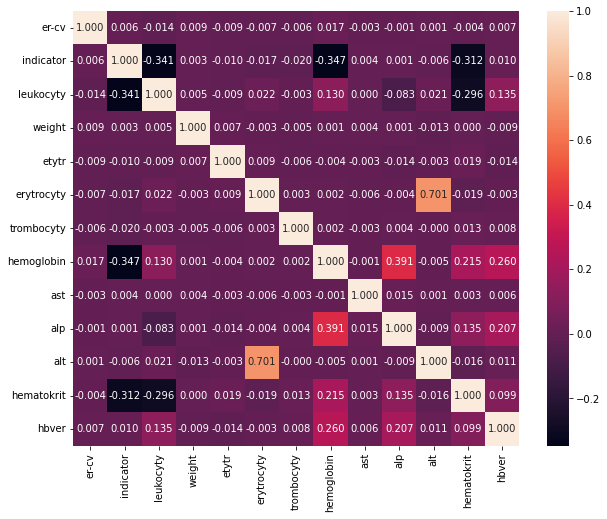

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

<AxesSubplot:xlabel='alt', ylabel='erytrocyty'>

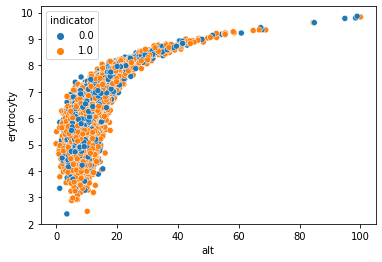

In [36]:
sns.scatterplot(
    data=df,
    x=df.alt,
    y=df.erytrocyty,
    hue=df.indicator
)

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

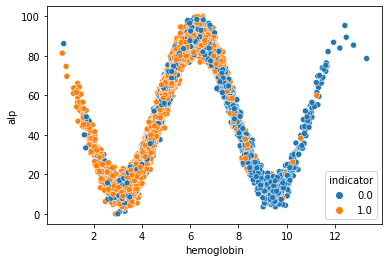

In [38]:
sns.scatterplot(
    data=df,
    x=df.hemoglobin,
    y=df.alp,
    hue=df.indicator
)

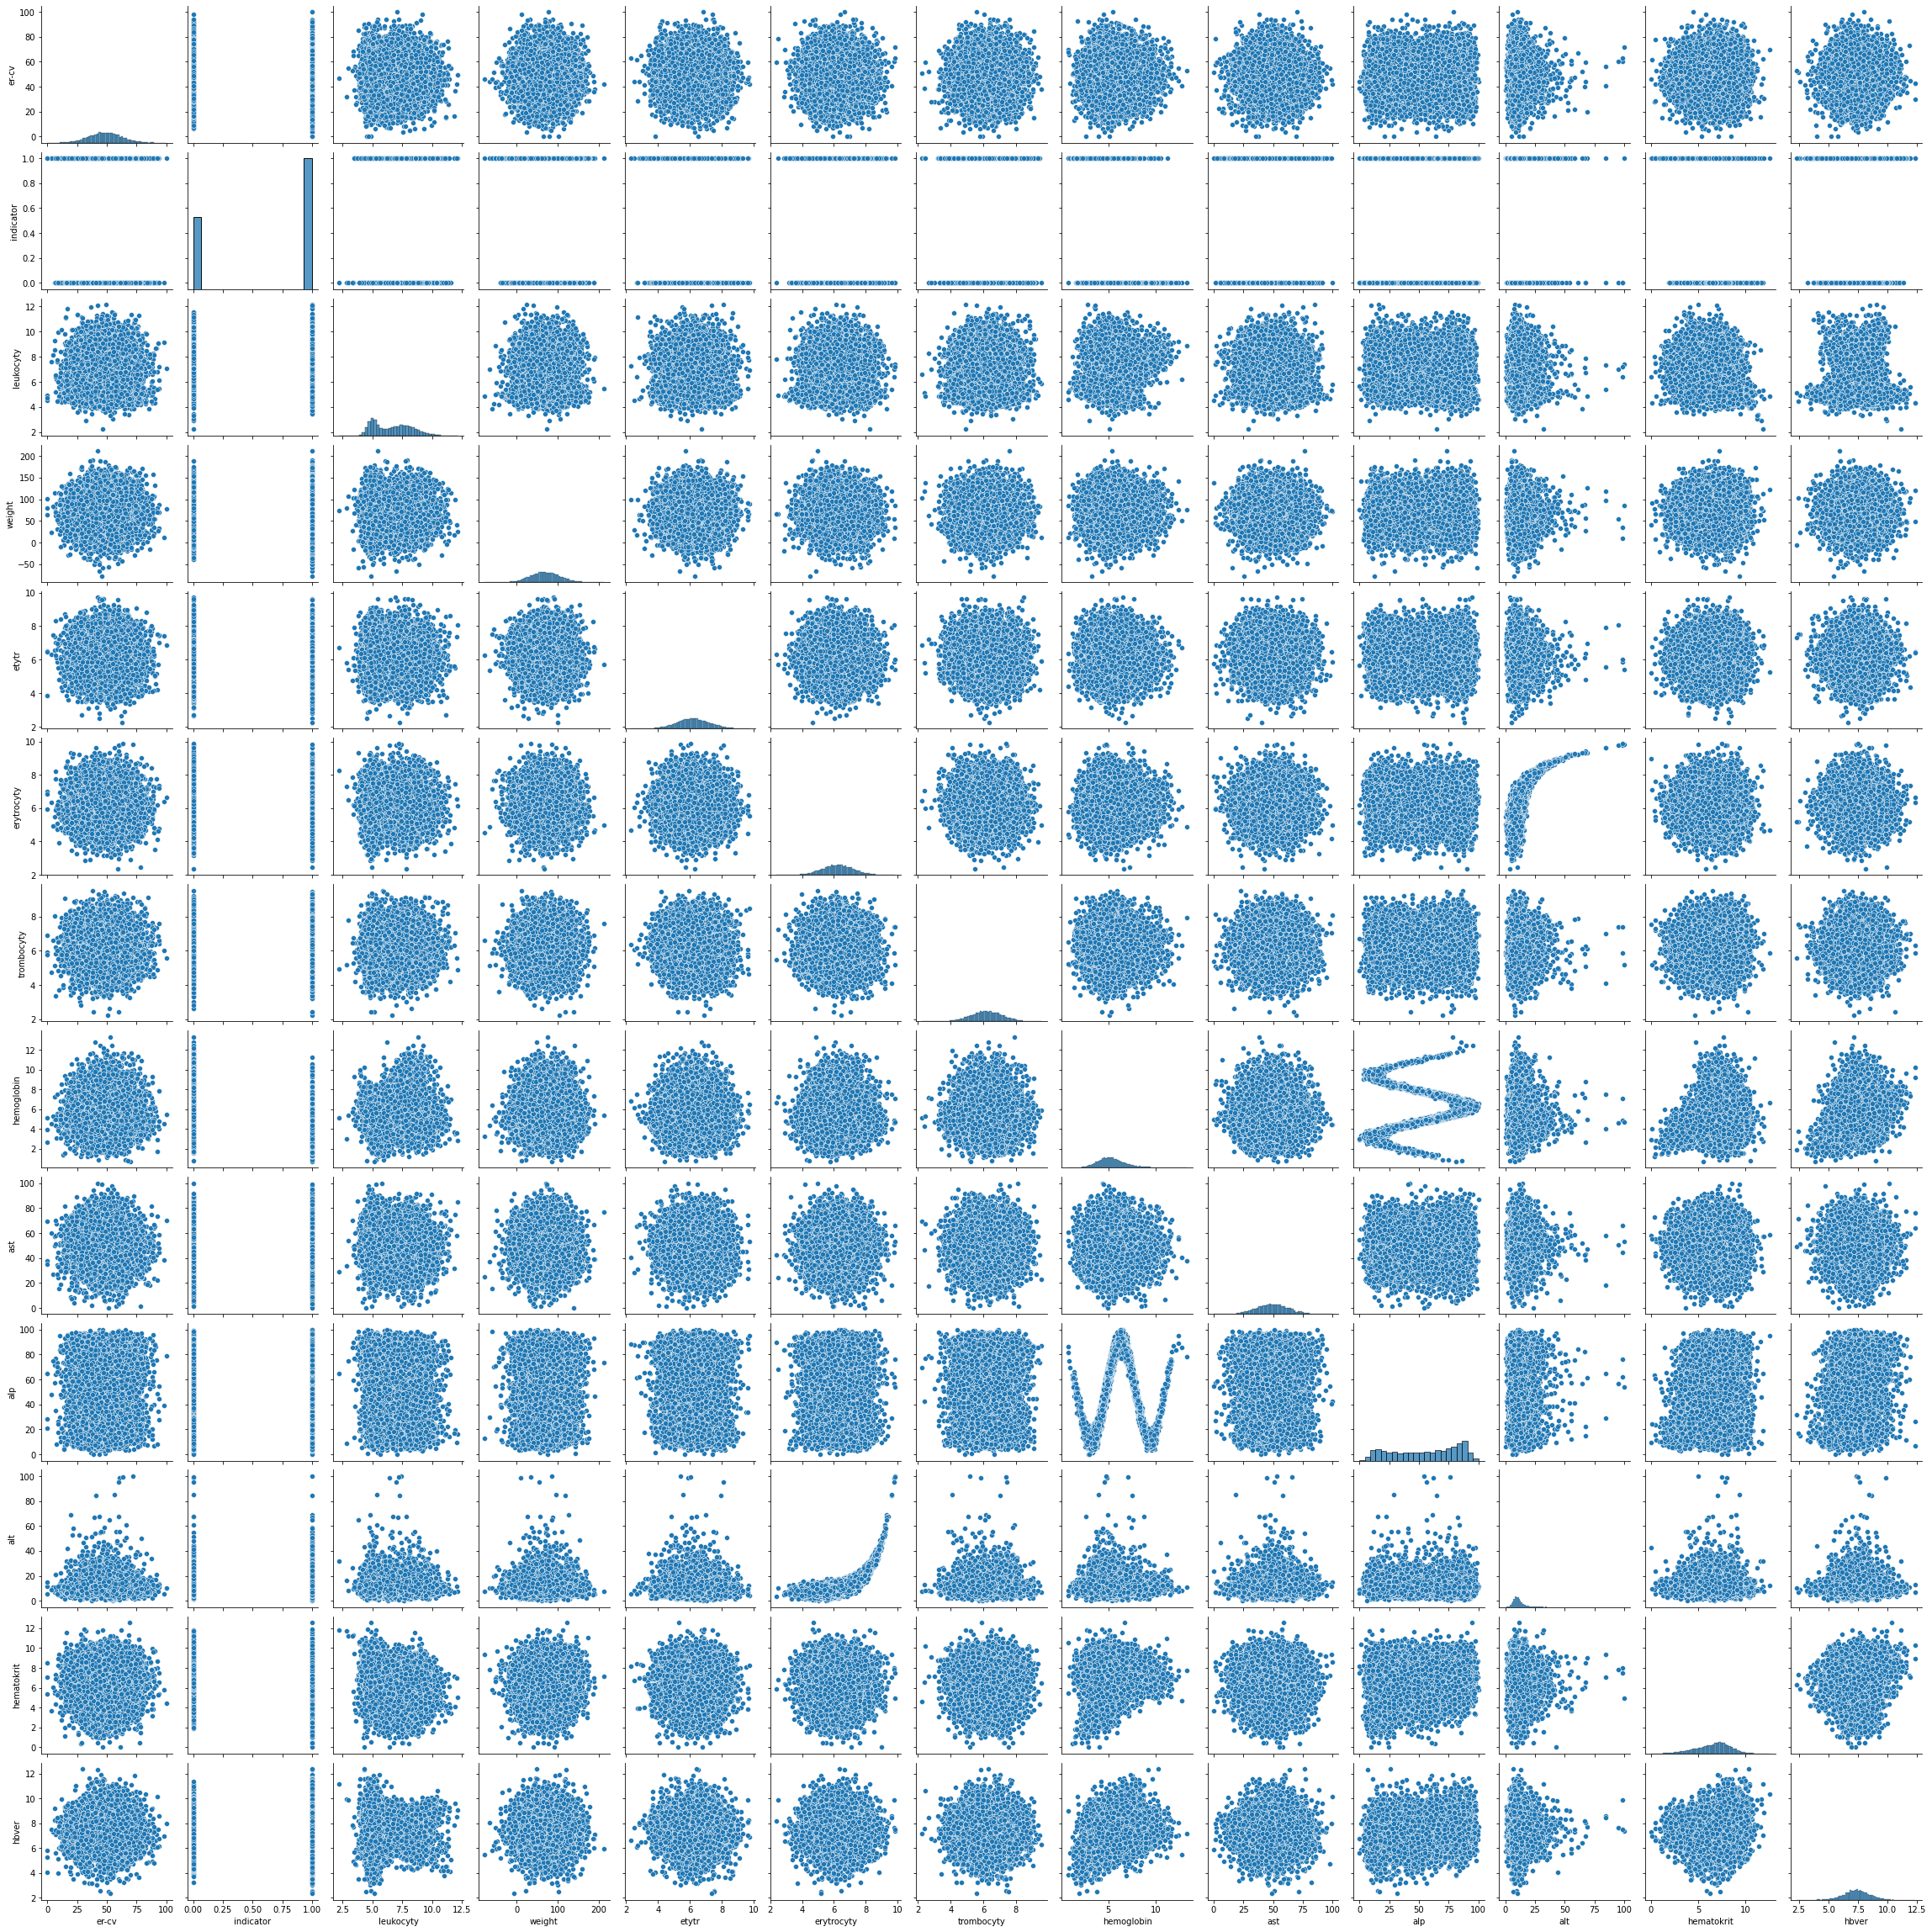

In [33]:
sns.pairplot(
    df
)

In [23]:
df.describe()

er-cv    indicator    leukocyty       weight        etytr  \
count  9957.000000  9987.000000  9957.000000  9987.000000  9957.000000   
mean     48.425748     0.643036     6.649040    69.606618     6.193915   
std      13.726128     0.479128     1.566503    34.914156     0.997552   
min       0.000000     0.000000     2.217920   -77.211600     2.278160   
25%      39.104980     0.000000     5.197150    45.966525     5.522740   
50%      48.429690     1.000000     6.602370    69.283390     6.179510   
75%      57.726030     1.000000     7.861560    93.614410     6.868990   
max     100.000000     1.000000    12.131510   211.399600     9.707420   

        erytrocyty   trombocyty   hemoglobin          ast          alp  \
count  9957.000000  9957.000000  9957.000000  9957.000000  9956.000000   
mean      6.236316     6.213423     5.421372    49.469559    55.509917   
std       0.992777     0.980931     1.620002    13.796167    27.049256   
min       2.370300     2.243970     0.707220     0.000000     0.000000   
25%       5.567770     5.560160     4.344490    40.141510    30.777518   
50%       6.228810     6.211510     5.254600    49.560750    59.361045   
75%       6.900100     6.877920     6.301200    58.766980    80.739665   
max       9.859350     9.527610    13.310770   100.000000   100.000000   

               alt   hematokrit        hbver  
count  9957.000000  9957.000000  9956.000000  
mean     11.496663     6.633143     7.397443  
std       5.958054     1.755006     1.149620  
min       0.000000     0.000000     2.330940  
25%       8.202420     5.517100     6.677130  
50%      10.461270     6.849510     7.392865  
75%      13.165980     7.869410     8.118615  
max     100.000000    12.580070    12.383660

In [58]:
# sns.histplot(df.loc[df.weight < 0, ["weight"]])

In [59]:
target = df.loc[:, ["leukocyty", "trombocyty", "erytrocyty", "hemoglobin", "etytr", "hematokrit", "hbver"]]
target.corr()

leukocyty  trombocyty  erytrocyty  hemoglobin     etytr  \
leukocyty    1.000000   -0.003380    0.021950    0.130395 -0.008621   
trombocyty  -0.003380    1.000000    0.002529    0.001715 -0.005864   
erytrocyty   0.021950    0.002529    1.000000    0.002365  0.008931   
hemoglobin   0.130395    0.001715    0.002365    1.000000 -0.003503   
etytr       -0.008621   -0.005864    0.008931   -0.003503  1.000000   
hematokrit  -0.296206    0.013198   -0.018787    0.215125  0.019285   
hbver        0.134567    0.008232   -0.002763    0.260297 -0.013692   

            hematokrit     hbver  
leukocyty    -0.296206  0.134567  
trombocyty    0.013198  0.008232  
erytrocyty   -0.018787 -0.002763  
hemoglobin    0.215125  0.260297  
etytr         0.019285 -0.013692  
hematokrit    1.000000  0.099117  
hbver         0.099117  1.000000

# VYSLEDKY - 2.

<AxesSubplot:>

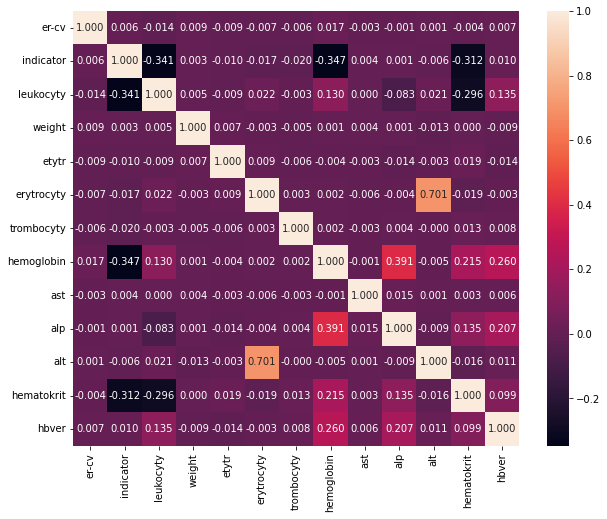

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

### analýza
Po analýze dvojíc atribútov, sme zistili, že väčšina atribútov voči sebe nemá kladnú ani zápornú koreláciu.
Dvojice, ktoré nejakú korelácie majú, sú:

eryttrocyty a alt: korelácia 0.7

<AxesSubplot:xlabel='alt', ylabel='erytrocyty'>

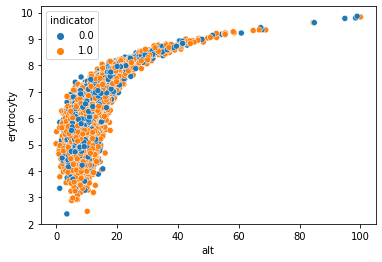

In [63]:
sns.scatterplot(
    data=df,
    x=df.alt,
    y=df.erytrocyty,
    hue=df.indicator
)

hemoglobin a alp: korelácia 0.4

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

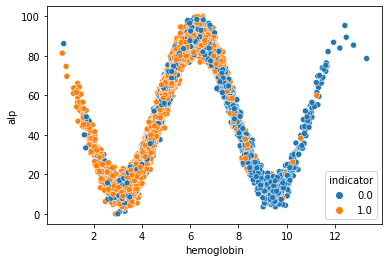

In [64]:
sns.scatterplot(
    data=df,
    x=df.hemoglobin,
    y=df.alp,
    hue=df.indicator
)